In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 9306.53it/s]


In [6]:
# gpd.GeoDataFrame(edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('edges_0408.GPKG',driver='GPKG')

In [7]:
id_nodes_length_sub = len(nodes)
id_edges_length_sub = len(edges)

In [8]:
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [9]:
# delete 3 pairs useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [10]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [11]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}

In [12]:
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [13]:
gpd.GeoDataFrame(city_sub_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_edges_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_stations[['osm_id', 'geometry','name']]).to_file('city_sub_stations_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_nodes[['geometry','degree','id']]).to_file('city_sub_nodes_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_sub_routes_0417.GPKG',driver='GPKG')

In [14]:
# # 将DataFrame保存为pickle文件
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [15]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [16]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [17]:
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [18]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [19]:
# Create a graph representing the subway network using the extracted edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [20]:
# city_sub_all_shortest_paths_id_dict

In [21]:
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)
city_sub_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,1,0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,258.660599,0.010346,258,"(1, 0)","(0, 1)"
1,2,3,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,4,5,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,7,6,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,28.046592,0.001122,28,"(7, 6)","(6, 7)"
4,492,8,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,382.935219,0.015317,382,"(492, 8)","(8, 492)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,803,463,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,462,803,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,246,804,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,9.568874,0.000383,9,"(246, 804)","(804, 246)"
938,804,463,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,73.789113,0.002952,73,"(804, 463)","(463, 804)"


In [22]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

In [23]:
G = nx.DiGraph()
for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

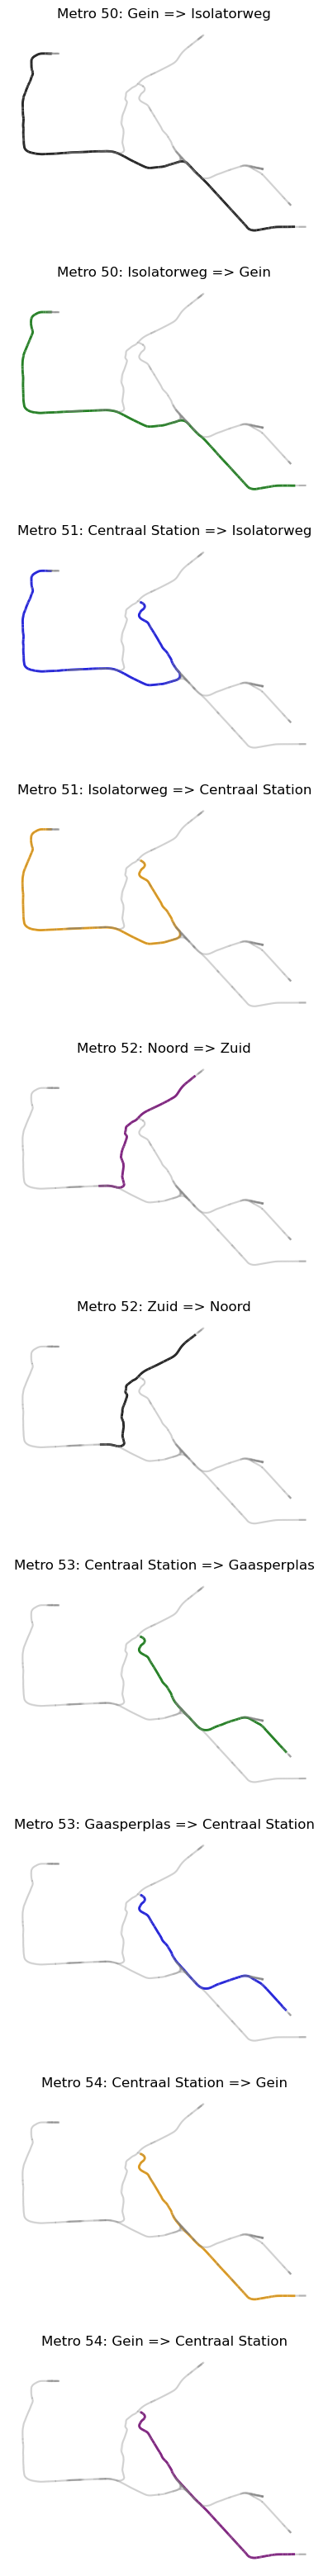

In [24]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [25]:
df50_1 = city_sub_shortest_path_edges_dict['Metro 50: Gein => Isolatorweg']
df50_2 = city_sub_shortest_path_edges_dict['Metro 50: Isolatorweg => Gein']

df51_1 = city_sub_shortest_path_edges_dict['Metro 51: Centraal Station => Isolatorweg']
df51_2 = city_sub_shortest_path_edges_dict['Metro 51: Isolatorweg => Centraal Station']

df52_1 = city_sub_shortest_path_edges_dict['Metro 52: Noord => Zuid'] 
df52_2 = city_sub_shortest_path_edges_dict['Metro 52: Zuid => Noord']

df53_1 = city_sub_shortest_path_edges_dict['Metro 53: Centraal Station => Gaasperplas']
df53_2 = city_sub_shortest_path_edges_dict['Metro 53: Gaasperplas => Centraal Station']

df54_1 = city_sub_shortest_path_edges_dict['Metro 54: Centraal Station => Gein']
df54_2 = city_sub_shortest_path_edges_dict['Metro 54: Gein => Centraal Station']

In [26]:
gpd.GeoDataFrame(df50_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df50_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df50_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df50_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df51_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df51_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df51_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df51_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df52_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df52_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df52_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df52_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df53_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df53_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df53_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df53_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df54_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df54_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df54_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df54_2_0417.GPKG',driver='GPKG')

## Add columns to stations

In [27]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [28]:
city_sub_new_nodes = add_columns_to_nodes(city_sub_order_route_dict, nodes)

In [29]:
city_sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.97400 52.29564),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.96013 52.29813),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.95213 52.30687),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.94762 52.31181),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.94628 52.32683),2,829,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,POINT (4.93028 52.32974),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


## Add columns to edges

In [30]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [31]:
city_sub_new_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [32]:
column_to_drop = 'count_weight'
city_sub_new_edges = city_sub_new_edges.drop(columns=column_to_drop)

In [33]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,subway,51


# Tram-Amsterdam

## Generate Baseline Networks

In [34]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 8503.97it/s]


Calculate_degree possibly unhappy


In [35]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [36]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [37]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [38]:
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

city_tram_edges['id'] = city_tram_edges['id'] + id_edges_length_sub
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub

In [39]:
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [40]:
# Delete edges which can cause the differences with routes
# tram 26-2
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
# # tram 4,14,24
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)

In [41]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,962,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,963,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,964,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,965,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,966,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3161,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3162,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3163,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3164,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)"


In [42]:
city_tram_nodes

,geometry,degree,id
0,POINT (4.9324018 52.3610615),3,868
1,POINT (4.9321097 52.361227),3,869
2,POINT (4.934085 52.3609657),3,870
3,POINT (4.933017 52.3603624),3,871
4,POINT (4.9337809 52.3611734),3,872
...,...,...,...
1915,POINT (4.9009826 52.3777045),0,2783
1916,POINT (4.890644 52.3719008),2,2784
1917,POINT (4.9899502 52.3580579),2,2785
1918,POINT (4.9272548 52.357015),0,2786


In [43]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [44]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [45]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [46]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [47]:
gpd.GeoDataFrame(city_tram_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_tram_edges_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_stations[['osm_id', 'geometry','name']]).to_file('city_tram_stations_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_tram_routes_0417.GPKG',driver='GPKG')

# city_tram_stations.to_excel('.\city_tram_stations.xlsx',header = True,index = False)

In [48]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [49]:
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)
city_tram_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,868,869,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,962,28.561299,0.002040,28,"(868, 869)","(869, 868)"
1,870,871,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,963,146.082551,0.010434,146,"(870, 871)","(871, 870)"
2,872,873,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,964,390.987463,0.027928,390,"(872, 873)","(873, 872)"
3,874,875,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,965,345.247175,0.024661,345,"(874, 875)","(875, 874)"
4,876,2598,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,966,35.152166,0.002511,35,"(876, 2598)","(2598, 876)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2364,1462,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3161,11.280287,0.000806,11,"(2364, 1462)","(1462, 2364)"
2200,1430,1940,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3162,12.010525,0.000858,12,"(1430, 1940)","(1940, 1430)"
2201,2365,1429,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3163,81.765515,0.005840,81,"(2365, 1429)","(1429, 2365)"
2202,1434,1947,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3164,12.587379,0.000899,12,"(1434, 1947)","(1947, 1434)"


In [50]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]
duplicated_rows

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
293,1203,1204,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,1255,33.538255,0.002396,33,"(1203, 1204)","(1204, 1203)"
293,1204,1203,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,1255,33.538255,0.002396,33,"(1204, 1203)","(1203, 1204)"
458,1359,1360,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,1420,32.103815,0.002293,32,"(1359, 1360)","(1360, 1359)"
458,1360,1359,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,1420,32.103815,0.002293,32,"(1360, 1359)","(1359, 1360)"
624,1502,1501,191467397,"LINESTRING (4.8391817 52.3875635, 4.839195 52....",tram,None,1586,45.449703,0.003246,45,"(1502, 1501)","(1501, 1502)"
624,1501,1502,191467397,"LINESTRING (4.8391817 52.3875635, 4.839195 52....",tram,None,1586,45.449703,0.003246,45,"(1501, 1502)","(1502, 1501)"
625,1501,1503,191467407,"LINESTRING (4.8391059 52.387403, 4.8391111 52....",tram,None,1587,18.711351,0.001337,18,"(1501, 1503)","(1503, 1501)"
625,1503,1501,191467407,"LINESTRING (4.8391059 52.387403, 4.8391111 52....",tram,None,1587,18.711351,0.001337,18,"(1503, 1501)","(1501, 1503)"
661,1544,1545,222748909,"LINESTRING (4.9003629 52.3778505, 4.9002941 52...",tram,None,1623,43.250296,0.003089,43,"(1544, 1545)","(1545, 1544)"
661,1545,1544,222748909,"LINESTRING (4.9003629 52.3778505, 4.9002941 52...",tram,None,1623,43.250296,0.003089,43,"(1545, 1544)","(1544, 1545)"


In [51]:
len(duplicated_rows)

54

In [52]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

In [53]:
G = nx.DiGraph()
for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

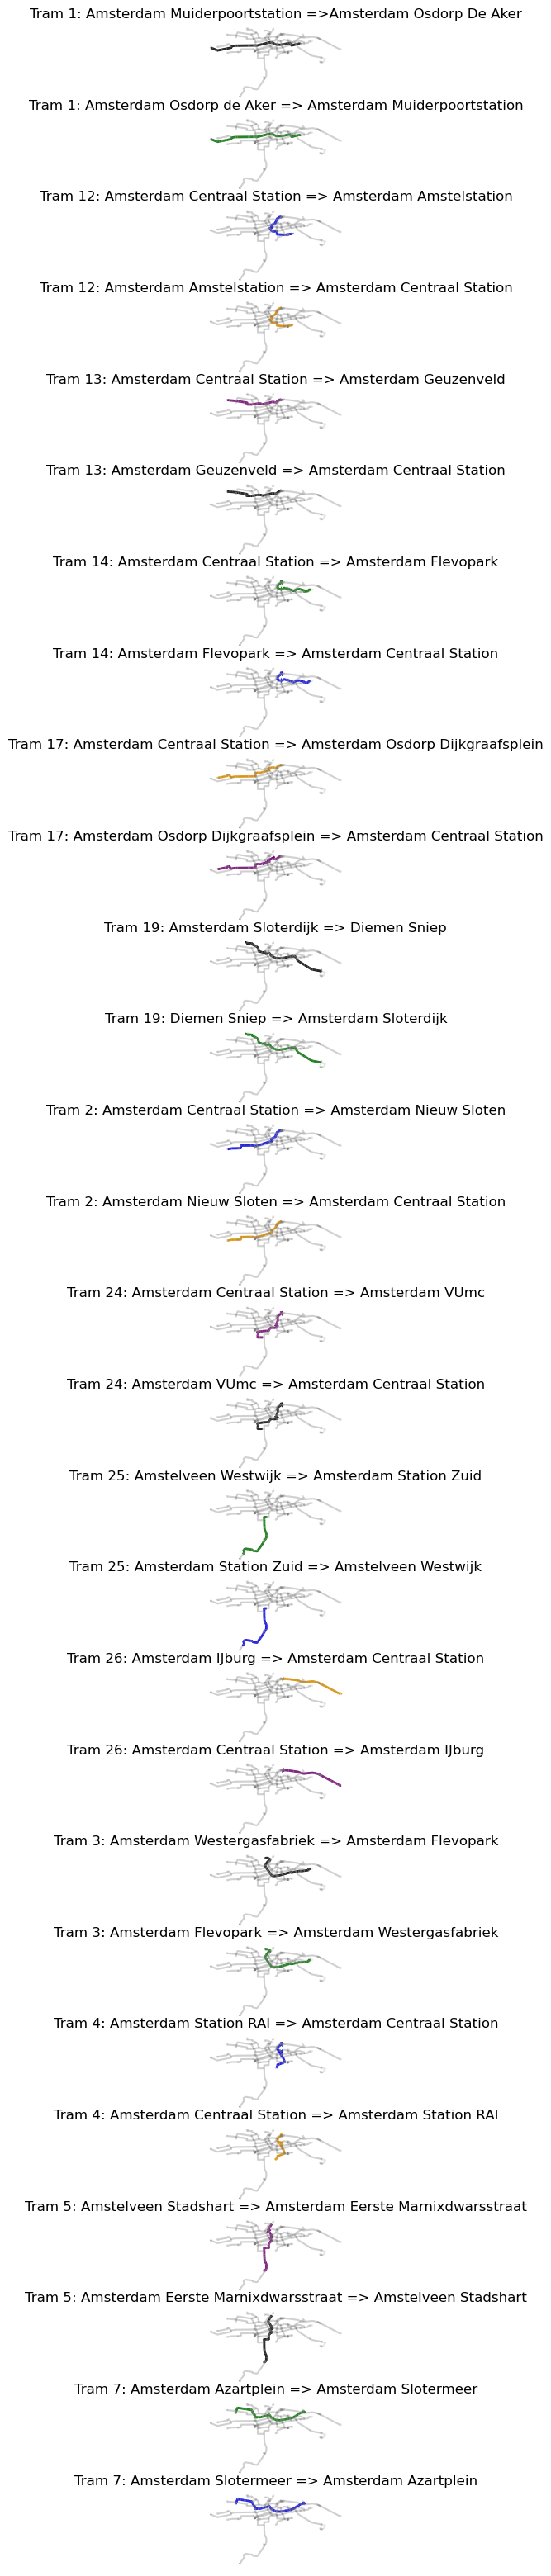

In [54]:
# Calculate the shortest path pairs for each subway line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# Plot all subway routes
plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [55]:
df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [56]:
gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0417.GPKG',driver='GPKG')
gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0417.GPKG',driver='GPKG')

## Add columns to nodes

In [57]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [58]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [59]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, city_tram_nodes)

In [60]:
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,2209,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,2371,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,2474,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,2480,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,2466,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (4.92630 52.36814),2,2427,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (4.92960 52.37020),2,2676,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (4.93483 52.37301),2,2383,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,POINT (4.93817 52.37346),2,2619,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [61]:
# city_tram_new_nodes.to_excel('./city_tram_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [62]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [63]:
city_tram_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,2209,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,2371,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,2474,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,2480,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,2466,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
393,POINT (4.84859 52.37333),2,2510,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"
408,POINT (4.84872 52.37298),2,2670,Jan van Galenstraat,4.848724,52.372983,"(4.8487242, 52.3729826)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 19, 7","13, 19, 7"
409,POINT (4.85007 52.37041),2,2756,Mercatorplein,4.850068,52.370406,"(4.8500681, 52.3704058)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 7","13, 7"
411,POINT (4.91857 52.36337),2,2671,Alexanderplein,4.918568,52.363371,"(4.9185684, 52.3633708)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"14, 19, 7","14, 19, 7"


In [64]:
len(city_tram_transfer_stations_df)

183

## Add columns to edges

In [65]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [66]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     from_id  to_id     osm_id  \
 0       868    869    7045610   
 1      2209   1496  770429442   
 2      1496    868  770429442   
 3       869   2371  770438581   
 4      2371   2474  770438581   
 ..      ...    ...        ...   
 91     1057   1058   26594761   
 92     2645   1057  322841907   
 93     1058   2484  322841927   
 94     2484   2483  322841927   
 95     2483   1715  322841927   
 
                                              geometry railway service    id  \
 0   LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram    None   962   
 1   LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram    None  2814   
 2   LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram    None  2815   
 3   LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram    None  2817   
 4   LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram    None  2818   
 ..                                        

In [67]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,city_tram_ordered_edges)

In [68]:
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,962,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,963,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,964,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,965,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,966,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3161,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)",NaN,NaN,NaN,NaN
2227,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3162,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)",NaN,NaN,NaN,NaN
2228,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3163,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)",NaN,NaN,NaN,NaN
2229,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3164,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)",NaN,NaN,NaN,NaN


# Connect Metro and Tram

In [67]:
buffer_radius = 300

In [68]:
sub_new_nodes_buffer_geometry = new_nodes_buffer(city_sub_new_nodes,buffer_radius)
sub_new_nodes_buffer_geometry

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,POINT (555390.884 6853898.052),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555690.884 6853898.052, 555689.440 6..."
1,POINT (553703.169 6853757.861),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,POINT (552158.745 6854212.080),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552458.745 6854212.080, 552457.301 6..."
3,POINT (551268.501 6855802.630),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551568.501 6855802.630, 551567.056 6..."
4,POINT (550766.294 6856701.528),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551066.294 6856701.528, 551064.850 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
82,POINT (552961.225 6859717.546),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((553261.225 6859717.546, 553259.780 6..."
83,POINT (551775.962 6860088.944),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((552075.962 6860088.944, 552074.517 6..."
84,POINT (550617.070 6859438.093),2,829,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((550917.070 6859438.093, 550915.626 6..."
85,POINT (548836.771 6859966.806),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54","POLYGON ((549136.771 6859966.806, 549135.327 6..."


In [69]:
city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)

In [70]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)
transfer_stations_sub_to_tram

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,degree_tram,id_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,POINT (547403.1208118391 6863046.022174509),2,819,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,2,2101,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,POINT (547411.0022317873 6863048.24534716),2,820,Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,2,2101,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
2,POINT (540744.7124492757 6861534.261047471),2,834,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,2,2515,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,POINT (540744.7124492757 6861534.261047471),2,834,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,2,2516,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,POINT (540742.3190802236 6861559.002901717),2,835,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,2,2515,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,POINT (546346.9548790398 6865723.4216876915),2,138,Weesperplein,4.907918,52.361326,"(4.9079182, 52.3613263)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,2,2448,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
110,POINT (546339.0511951934 6865720.341024122),2,460,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,2,2449,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"
111,POINT (546339.0511951934 6865720.341024122),2,460,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,2,2448,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
112,POINT (542567.1127011032 6861713.358806675),2,840,Zuid,4.873963,52.339322,"(4.8739633, 52.3393223)",Metro 50: Gein => Isolatorweg,subway,"50, 51, 52",...,2,1068,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [71]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
...,...,...
109,Weesperplein,Weesperplein
110,Weesperplein,Weesperplein
111,Weesperplein,Weesperplein
112,Zuid,Station Zuid


In [72]:
transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0417.xlsx',header = True,index = False)

In [73]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)"
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)"
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)"
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)"
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)"
...,...,...,...,...,...
109,"LINESTRING (4.9079182 52.3613263, 4.9071213 52...",138,2448,"(138, 2448)","(2448, 138)"
110,"LINESTRING (4.9078472 52.3613094, 4.9091584 52...",460,2449,"(460, 2449)","(2449, 460)"
111,"LINESTRING (4.9078472 52.3613094, 4.9071213 52...",460,2448,"(460, 2448)","(2448, 460)"
112,"LINESTRING (4.8739633 52.3393223, 4.8731849 52...",840,1068,"(840, 1068)","(1068, 840)"


In [104]:
id_edges_length_tram

2204

In [105]:
id_edges_length_sub

962

In [103]:
id_from_num = id_edges_length_tram+id_edges_length_sub
id_from_num

3166

In [74]:
gpd.GeoDataFrame(connect_edges_sub_to_tram[['geometry','from_id','to_id']]).to_file('connect_edges_sub_to_tram_0417.GPKG',driver='GPKG')

# Test OD pairs_only created by metro 

In [75]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    each_o_point = station_df.loc[[0]]
    origin_df = pd.concat([origin_df,each_o_point])

origin_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)

In [76]:
origin_df

,geometry,name
0,POINT (4.9891612 52.2964067),Gein
1,POINT (4.8505967 52.3952329),Isolatorweg
2,POINT (4.9008686 52.3773546),Centraal Station
3,POINT (4.932402 52.4021571),Noord
4,POINT (4.8780248 52.3393025),Zuid
5,POINT (4.9842364 52.3115025),Gaasperplas


In [77]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    each_d_point = station_df.loc[[station_df.index[-1]]]
    destination_df = pd.concat([destination_df,each_d_point])

destination_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)

In [78]:
destination_df

,geometry,name
0,POINT (4.8505958 52.3951031),Isolatorweg
1,POINT (4.989299 52.2962711),Gein
2,POINT (4.9010471 52.3775081),Centraal Station
3,POINT (4.8772326 52.3393181),Zuid
4,POINT (4.932585 52.4020575),Noord
5,POINT (4.9843391 52.3111615),Gaasperplas


In [86]:
origin_df['geo_x']= gpd.GeoDataFrame(origin_df).geometry.x
origin_df['geo_y']= gpd.GeoDataFrame(origin_df).geometry.y
destination_df['geo_x']= gpd.GeoDataFrame(destination_df).geometry.x
destination_df['geo_y']= gpd.GeoDataFrame(destination_df).geometry.y

In [87]:
OD_list = []

for index_origin, row_origin in origin_df.iterrows():
    o_geo_x = row_origin['geo_x']
    o_geo_y = row_origin['geo_y']
       
    for index_destination, row_destination in destination_df.iterrows():
        d_geo_x = row_destination['geo_x']
        d_geo_y = row_destination['geo_y']
        
        # Append a dictionary to the list
        OD_list.append({
            's_coordinates_x': o_geo_x,
            's_coordinates_y': o_geo_y,
            'e_coordinates_x': d_geo_x,
            'e_coordinates_y': d_geo_y
        })

# Create a DataFrame from the list of dictionaries
OD_df = pd.DataFrame(OD_list)  

In [89]:
OD_df

,s_coordinates_x,s_coordinates_y,e_coordinates_x,e_coordinates_y
0,4.989161,52.296407,4.850596,52.395103
1,4.989161,52.296407,4.989299,52.296271
2,4.989161,52.296407,4.901047,52.377508
3,4.989161,52.296407,4.877233,52.339318
4,4.989161,52.296407,4.932585,52.402057
5,4.989161,52.296407,4.984339,52.311161
6,4.850597,52.395233,4.850596,52.395103
7,4.850597,52.395233,4.989299,52.296271
8,4.850597,52.395233,4.901047,52.377508
9,4.850597,52.395233,4.877233,52.339318


In [91]:
city_two_layer_nodes = pd.concat([city_sub_new_nodes, city_tram_new_nodes])
city_two_layer_edges = pd.concat([city_sub_new_edges, city_tram_new_edges])

In [92]:
G1 = nx.DiGraph()
for node_id, row in city_two_layer_nodes.iterrows():
    geometry = row['geometry']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [95]:
edges_for_G1 = city_two_layer_edges[['from_id', 'to_id', 'time', 'weights']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']

In [97]:
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    # capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

In [101]:
# Initialize an empty dictionary to store results
OD_edges_result_dict = {}

for index, row in OD_df.iterrows():
    # Get origin-destination pair
    OD_pair = pd.Series(row)
    start_node, end_node = s_e_node_df(OD_pair, city_two_layer_nodes)

    # Check if start and end nodes are on the same route
    s_on_route_ref, e_on_route_ref = s_e_on_route_ref(start_node, end_node)
    s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)
    s_e_same_routes_df = s_e_same_routes(s_on_route_ref, e_on_route_ref)

    # If on the same route, find shortest path directly
    all_btw_stations_on_same_route_gdf_s_e = all_stations_on_same_route_gdf_transfer(s_e_same_routes_df, city_sub_routes, city_sub_order_route_dict, start_node, end_node)
    btw_all_id_pairs_list = btw_all_ids_pairs_transfer_all(all_btw_stations_on_same_route_gdf_s_e, city_two_layer_nodes)
    btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)
    # Find shortest paths
    shortest_path_pairs_way = all_shortest_paths(G1, btw_all_id_pairs_list_unique[0], city_two_layer_nodes)
    duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, city_two_layer_nodes)  

s_node and e_node are on one same route.
The next step is to find the same route ---- using function 's_e_same_routes'
s_node and e_node are on same route/routes:   ref
0  25



KeyError: nan

In [ ]:
# revise test_OD_metro_new to return a dictionary where the keys are the indices and the values are the shortest_path_edges_way dataframes
def test_OD_metro_new_dict(OD_df, city_sub_new_nodes, city_sub_new_edges, city_sub_routes, city_sub_order_route_dict):
    """
    Calculate shortest paths between origin-destination pairs in OD_df considering metro routes.

    Parameters:
        OD_df (pandas.DataFrame): DataFrame containing origin-destination pairs.
        city_sub_new_nodes (pandas.DataFrame): DataFrame containing node information.
        city_sub_new_edges (pandas.DataFrame): DataFrame containing edge information.
        city_sub_routes (pandas.DataFrame): DataFrame containing metro routes.
        city_sub_order_route_dict (dict): Dictionary mapping route orders to routes.

    Returns:
        dict: A dictionary where keys are the indices and values are the shortest_path_edges_way dataframes.
    """

    # Initialize an empty dictionary to store results
    OD_edges_result_dict = {}

    for index, row in OD_df.iterrows():
        # Get origin-destination pair
        OD_pair = pd.Series(row)
        start_node, end_node = s_e_node_df(OD_pair, city_sub_new_nodes)

        # Check if start and end nodes are on the same route
        s_on_route_ref, e_on_route_ref = s_e_on_route_ref(start_node, end_node)
        s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)
        s_e_same_routes_df = s_e_same_routes(s_on_route_ref, e_on_route_ref)

        if s_e_same_routes_df is None:
            # If not on the same route, find shortest path via transfer station
            t_station_node = transfer_station_one_mode(city_sub_routes, start_node, end_node, city_sub_new_nodes, city_sub_order_route_dict)

            # Find shortest paths from start to transfer station and transfer station to end
            s_on_route_ref, t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)
            s_t_same_routes_df = s_e_same_routes(s_on_route_ref, t_on_route_ref)
            all_btw_stations_on_same_route_gdf_s_t = all_stations_on_same_route_gdf_transfer(s_t_same_routes_df, city_sub_routes, city_sub_order_route_dict, start_node, t_station_node)
            btw_all_id_pairs_list_s_t = btw_all_ids_pairs_transfer_all(all_btw_stations_on_same_route_gdf_s_t, city_sub_new_nodes)

            t_on_route_ref, e_on_route_ref = s_e_on_route_ref(t_station_node, end_node)
            t_e_same_routes_df = s_e_same_routes(t_on_route_ref, e_on_route_ref)
            all_btw_stations_on_same_route_gdf_t_e = all_stations_on_same_route_gdf_transfer(t_e_same_routes_df, city_sub_routes, city_sub_order_route_dict, t_station_node, end_node)
            btw_all_id_pairs_list_t_e = btw_all_ids_pairs_transfer_all(all_btw_stations_on_same_route_gdf_t_e, city_sub_new_nodes)

            # Combine unique pairs of start-transfer and transfer-end stations
            btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)
            btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

            # Create ground graph
            G = create_ground_graph(city_sub_new_edges, city_sub_new_nodes)

            # Find shortest paths from start to transfer station and transfer station to end
            shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], city_sub_new_edges)
            duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, city_sub_new_edges)
            shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], city_sub_new_edges)
            duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, city_sub_new_edges)

            # Combine paths from start to transfer and transfer to end
            shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t, shortest_path_edges_way_t_e])

        else:
            # If on the same route, find shortest path directly
            all_btw_stations_on_same_route_gdf_s_e = all_stations_on_same_route_gdf_transfer(s_e_same_routes_df, city_sub_routes, city_sub_order_route_dict, start_node, end_node)
            btw_all_id_pairs_list = btw_all_ids_pairs_transfer_all(all_btw_stations_on_same_route_gdf_s_e, city_sub_new_nodes)
            btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

            # Create ground graph
            G = create_ground_graph(city_sub_new_edges, city_sub_new_nodes)

            # Find shortest paths
            shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], city_sub_new_edges)
            duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, city_sub_new_nodes)

        # Store the result in the dictionary
        OD_edges_result_dict[index] = shortest_path_edges_way.copy()
        print(index)

    return OD_edges_result_dict


In [88]:
OD_edges_result_dict = test_OD_metro_new_dict(OD_df,city_sub_new_nodes,city_sub_new_edges,city_sub_routes,city_sub_order_route_dict)
OD_edges_result_dict

s_node and e_node are on several same routes.
The next step is to find the same routes ---- using function 's_e_same_routes'
s_node and e_node are on same route/routes:   ref
0  50
1  54

All dataframes in the list are the same


KeyError: 'id'

In [ ]:
for i in range(len(OD_edges_result_dict)):
    fig, ax = plt.subplots(1, 1, figsize=(30, 20))
    gpd.GeoDataFrame(city_sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
    gpd.GeoDataFrame(OD_edges_result_dict[i].copy()).plot(ax=ax, zorder=1, linewidth=(OD_edges_result_dict[i].count_weight), color='orange')

In [122]:
buffer_radius = 200

In [110]:
sub_new_nodes_buffer_geometry = new_nodes_buffer(city_sub_new_nodes,buffer_radius)
sub_new_nodes_buffer_geometry

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,POINT (555390.884 6853898.052),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555590.884 6853898.052, 555589.921 6..."
1,POINT (553703.169 6853757.861),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((553903.169 6853757.861, 553902.206 6..."
2,POINT (552158.745 6854212.080),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552358.745 6854212.080, 552357.782 6..."
3,POINT (551268.501 6855802.630),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551468.501 6855802.630, 551467.538 6..."
4,POINT (550766.294 6856701.528),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((550966.294 6856701.528, 550965.331 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
82,POINT (552961.225 6859717.546),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((553161.225 6859717.546, 553160.262 6..."
83,POINT (551775.962 6860088.944),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((551975.962 6860088.944, 551974.999 6..."
84,POINT (550617.070 6859438.093),2,829,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((550817.070 6859438.093, 550816.107 6..."
85,POINT (548836.771 6859966.806),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54","POLYGON ((549036.771 6859966.806, 549035.808 6..."


In [70]:
city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)

In [71]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)
transfer_stations_sub_to_tram

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,degree_tram,id_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,POINT (547411.0022317873 6863048.24534716),2,820,Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,2,1233,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,POINT (547403.1208118391 6863046.022174509),2,819,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,2,1233,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
2,POINT (540742.3190802236 6861559.002901717),2,835,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,2,1647,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,POINT (540742.3190802236 6861559.002901717),2,835,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,2,1648,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,POINT (540744.7124492757 6861534.261047471),2,834,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,2,1648,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
5,POINT (540744.7124492757 6861534.261047471),2,834,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,2,1647,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
6,POINT (545562.1969967436 6868645.715657004),2,731,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2,1910,Centraal Station,4.900972,52.377798,"(4.9009723, 52.3777976)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
7,POINT (545562.1969967436 6868645.715657004),2,731,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2,676,Centraal Station,4.900363,52.377851,"(4.9003629, 52.3778505)",Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
8,POINT (545562.1969967436 6868645.715657004),2,731,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2,1909,Centraal Station,4.900981,52.377749,"(4.9009806, 52.3777485)",Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
9,POINT (545562.1969967436 6868645.715657004),2,731,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2,491,Centraal Station,4.900382,52.377894,"(4.9003819, 52.3778942)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"


In [88]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
5,Amstelveenseweg,Amstelveenseweg
6,Centraal Station,Centraal Station
7,Centraal Station,Centraal Station
8,Centraal Station,Centraal Station
9,Centraal Station,Centraal Station


In [72]:
transfer_stations_sub_to_tram.iloc[0][18]

(4.9178945, 52.347445)

In [73]:
type(transfer_stations_sub_to_tram.iloc[0][6])

tuple

In [77]:
# Create an empty list to store LineString objects
lines = []

# Iterate over each row in transfer_stations_sub_to_tram
for index, row in transfer_stations_sub_to_tram.iterrows():
    # Create a LineString object
    line = LineString([list(row.iloc[6]), list(row.iloc[18])])
    
    # Append the LineString object to the list
    lines.append(line)

# Create a new DataFrame with the 'geometry' list
result_df = pd.DataFrame({'geometry': lines})

                                             geometry
0   LINESTRING (4.9174767 52.3466483, 4.9178945 52...
1   LINESTRING (4.9174059 52.3466361, 4.9178945 52...
2   LINESTRING (4.8575709 52.3384751, 4.8572486 52...
3   LINESTRING (4.8575709 52.3384751, 4.857301 52....
4   LINESTRING (4.8575924 52.3383393, 4.857301 52....
5   LINESTRING (4.8575924 52.3383393, 4.8572486 52...
6   LINESTRING (4.9008686 52.3773546, 4.9009723 52...
7   LINESTRING (4.9008686 52.3773546, 4.9003629 52...
8   LINESTRING (4.9008686 52.3773546, 4.9009806 52...
9   LINESTRING (4.9008686 52.3773546, 4.9003819 52...
10  LINESTRING (4.9010471 52.3775081, 4.9003434 52...
11  LINESTRING (4.9008686 52.3773546, 4.9003434 52...
12  LINESTRING (4.9008686 52.3773546, 4.9009807 52...
13  LINESTRING (4.9010471 52.3775081, 4.9009807 52...
14  LINESTRING (4.9010471 52.3775081, 4.9009769 52...
15  LINESTRING (4.9010471 52.3775081, 4.9009723 52...
16  LINESTRING (4.9010471 52.3775081, 4.9003819 52...
17  LINESTRING (4.9008686 52

In [79]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,subway,51


In [85]:
city_sub_stations.loc[city_sub_stations.name=='Station Sloterdijk']

,osm_id,public_transport,railway,tram,subway,highway,bus,name,geometry,geo_x,geo_y
136,250222332,stop_position,stop,None,yes,None,None,Station Sloterdijk,POINT (4.83898 52.38904),4.838979,52.389038
1905,4077313773,stop_position,stop,None,yes,None,None,Station Sloterdijk,POINT (4.83876 52.38904),4.838763,52.389036
